In [15]:
import pandas as pd
from matplotlib import pyplot

In [20]:
transaction_train_path = '00_data/transactions_train.csv'

transaction_train_df = pd.read_csv(transaction_train_path, index_col=['customer_id', 'article_id'], parse_dates=['t_dat'])
transaction_train_df.head()

t_dat  \
customer_id                                        article_id              
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad... 663713001  2018-09-20   
                                                   541518023  2018-09-20   
00007d2de826758b65a93dd24ce629ed66842531df66993... 505221004  2018-09-20   
                                                   685687003  2018-09-20   
                                                   685687004  2018-09-20   

                                                                  price  \
customer_id                                        article_id             
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad... 663713001   0.050831   
                                                   541518023   0.030492   
00007d2de826758b65a93dd24ce629ed66842531df66993... 505221004   0.015237   
                                                   685687003   0.016932   
                                                   685687004   0.016932   

                                                               sales_channel_id  
customer_id                                        article_id                    
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad... 663713001                  2  
                                                   541518023                  2  
00007d2de826758b65a93dd24ce629ed66842531df66993... 505221004                  2  
                                                   685687003                  2  
                                                   685687004                  2

## Number of sells per day (in a year)

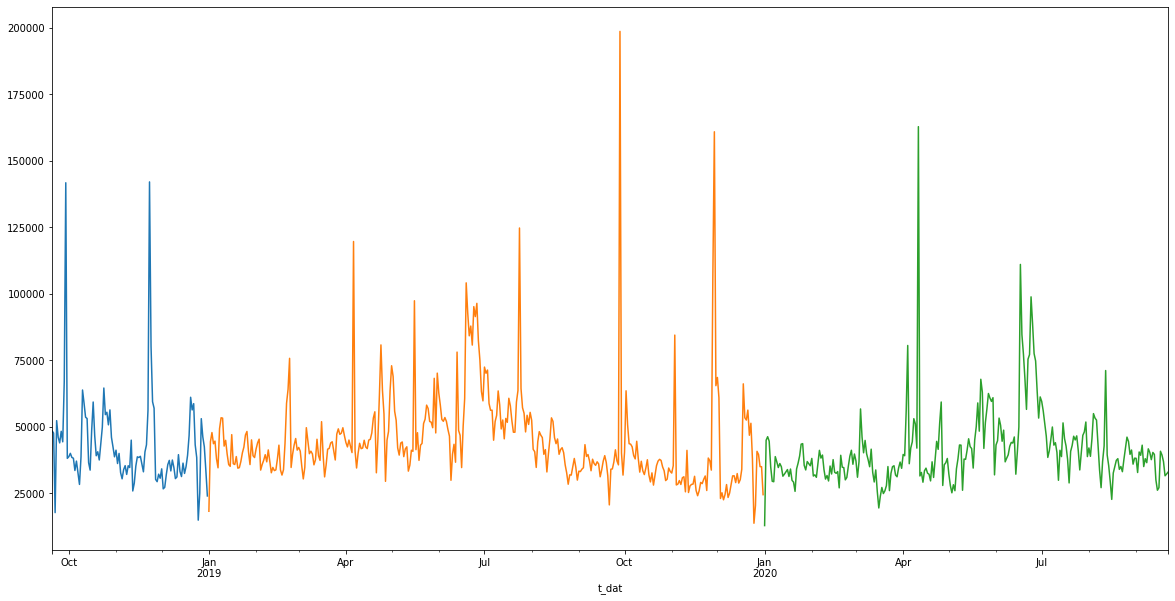

In [28]:
pyplot.figure(figsize=[20, 10])

for year in [2018, 2019, 2020]:
    sells_year = transaction_train_df[transaction_train_df['t_dat'].dt.year == year]
    sells_year = sells_year.groupby(['t_dat']).t_dat.count()
    sells_year.plot()

pyplot.show()

## Average sells per year per customer

In [42]:
result_list = []

for year in [2018, 2019, 2020]:
    sales_year = transaction_train_df[transaction_train_df['t_dat'].dt.year == year]
    sales_customer = sales_year.groupby(['customer_id']).t_dat.count()
    avg_sales_customer = sales_customer.mean()
    result_list.append({year: avg_sales_customer})

result_list

[{2018: 7.590103684534728},
 {2019: 16.78635668882403},
 {2020: 12.727282421724677}]